In [18]:
# hack to make notebook appear full-width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [1]:
import pickle

import numpy as np
import matplotlib.pyplot as plt

from macrel import graphs
from macrel import viewmap
from macrel import vast11data as vast

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
N = len(vast.NODES)

In [3]:
def blend(probs, weights):
    assert len(probs) == len(weights)
    k = len(probs)

    total_weight = sum(weights)
    norm_weights = [w/total_weight for w in weights]

    p = probs[0] * norm_weights[0]
    for i in range(1, k):
        p += probs[i] * norm_weights[i]

    return p

In [4]:
weights = {i: 10 for i in range(N)}
graph_props = vast.VAST11GraphProps(weights)

data = pickle.load(open("vast11-connections.pickle", "rb"))

topo_count = vast.get_vast11_topology()
topo_prob = graphs.get_prob_matrix(topo_count)

/Users/dbeach/Desktop/macrel/graphs.py:69: RuntimeWarning: divide by zero encountered in log
  dist = -np.log(prob)


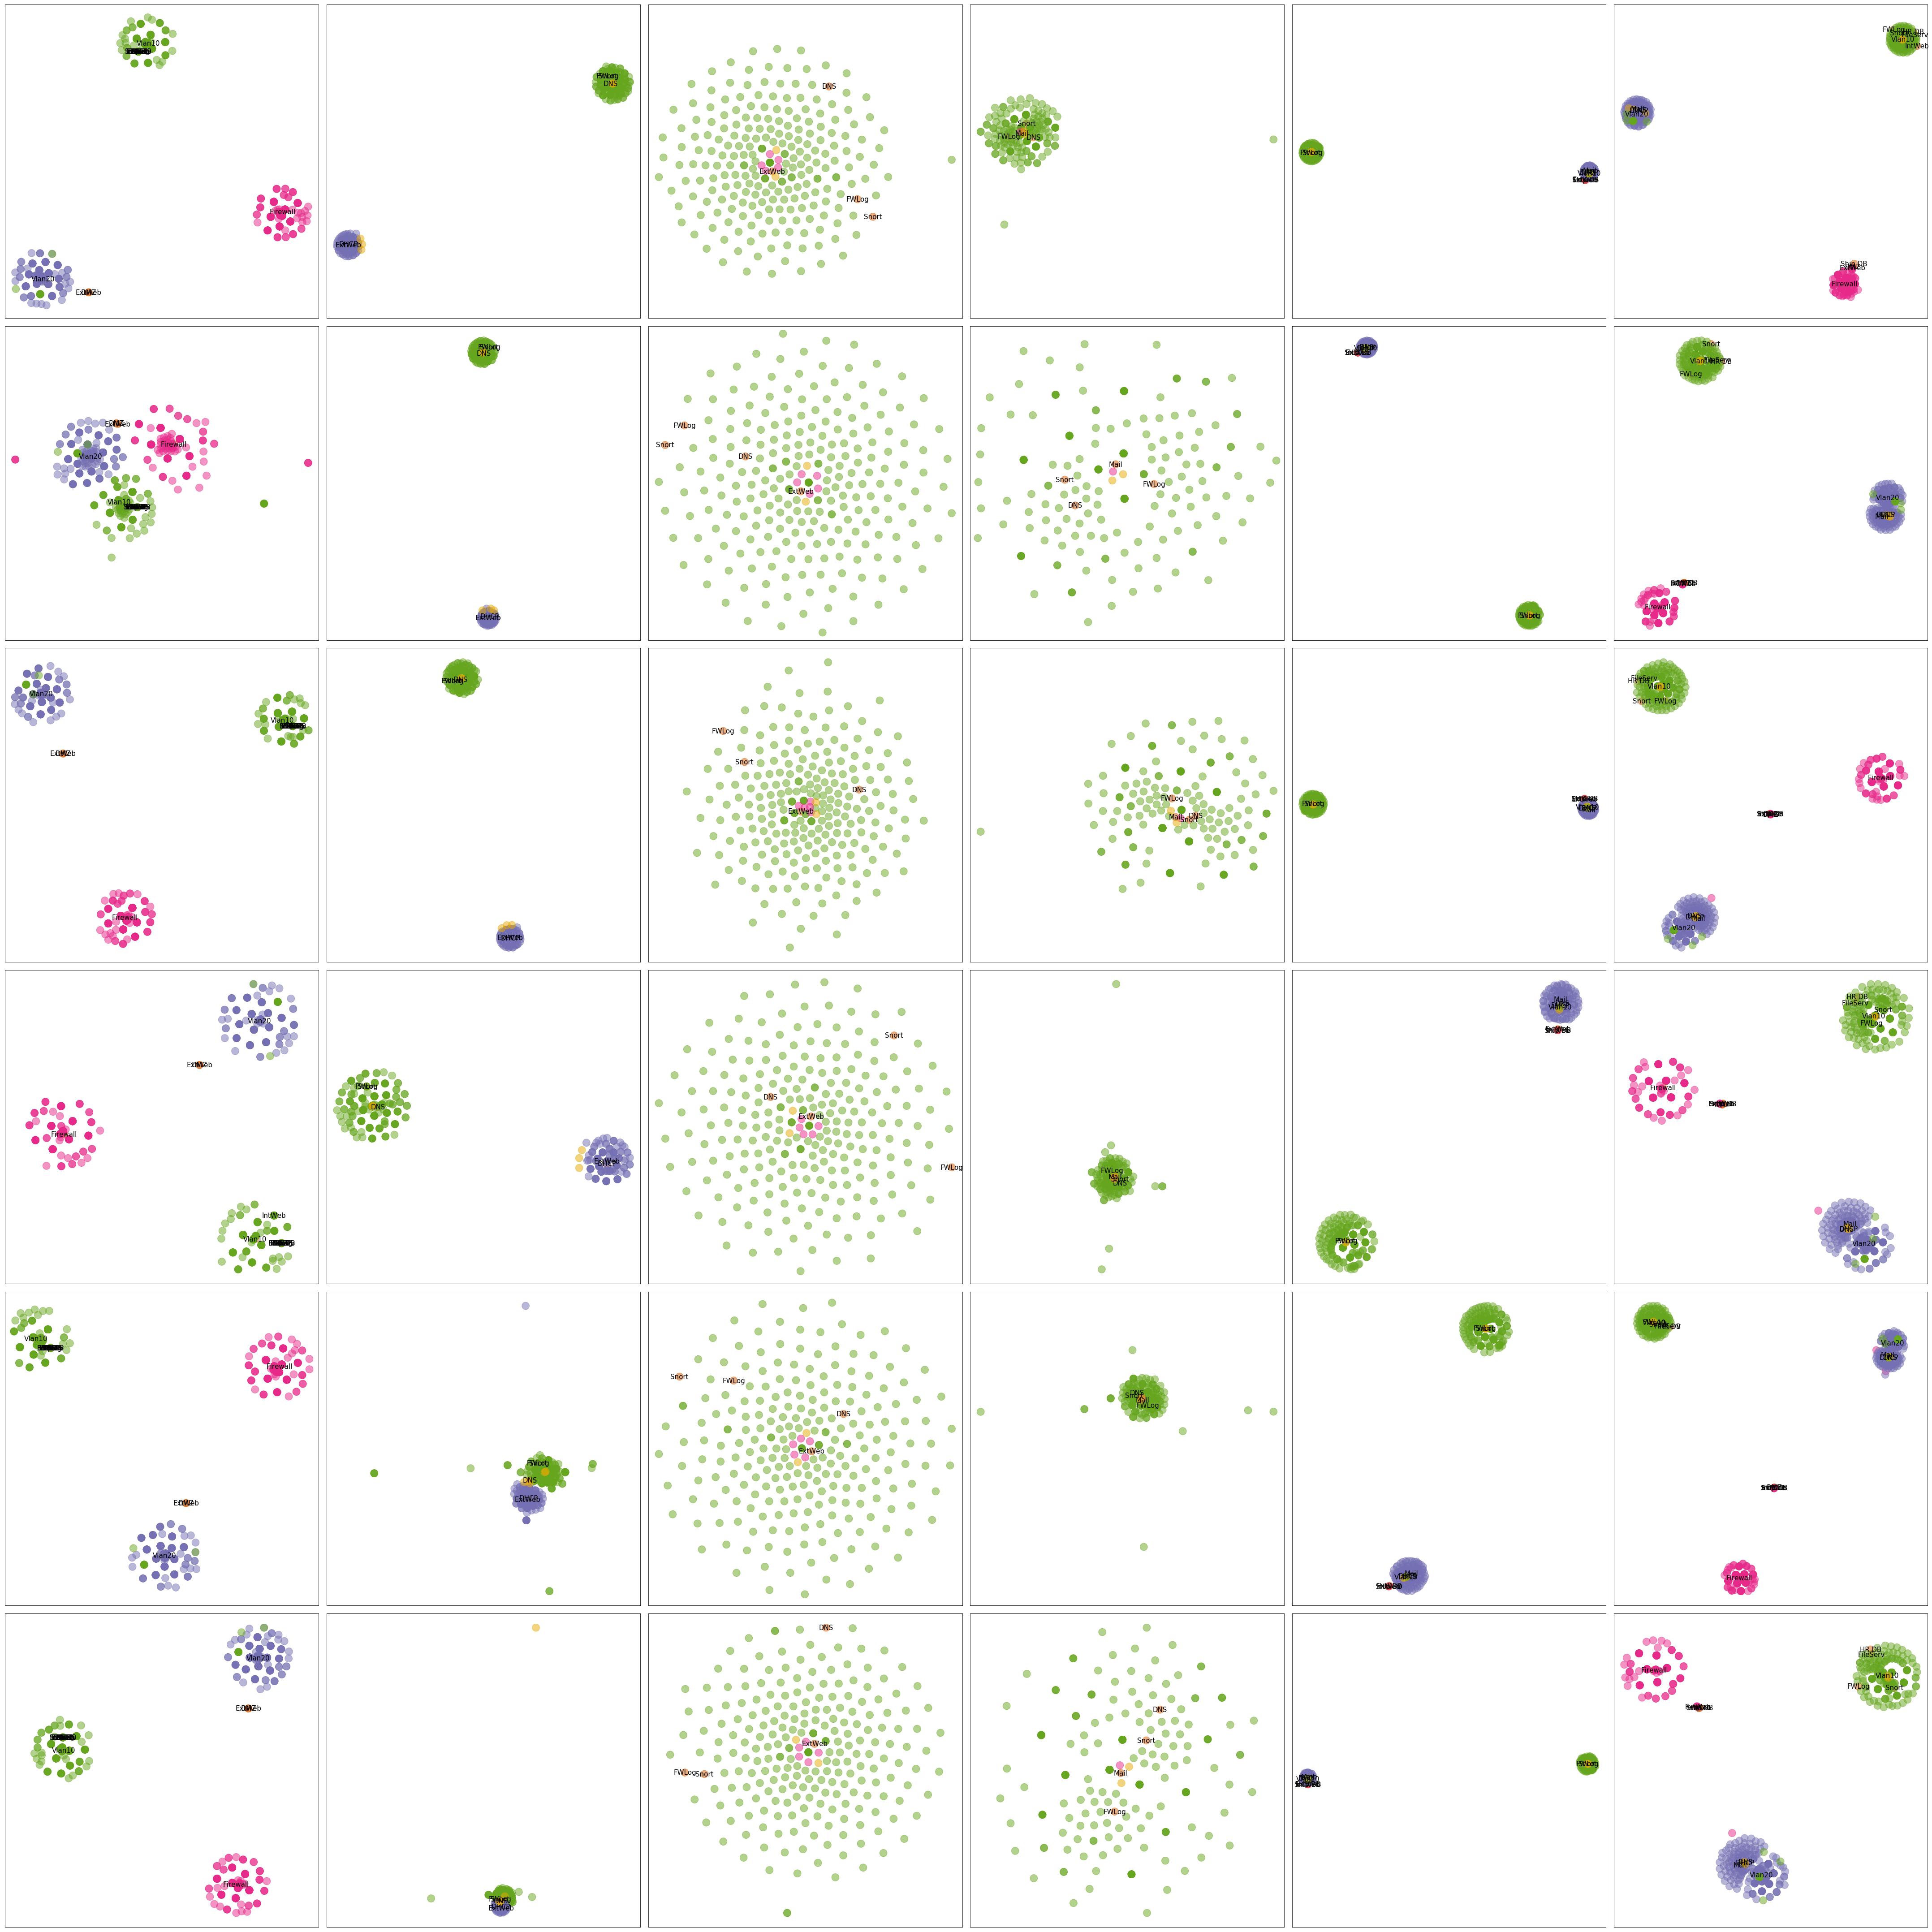

In [19]:
maps = []

STARTS = [0] #, 96, 144]
STOPS = [192] # , 144, 192]

for start, stop in zip(STARTS, STOPS):
    dns_count = data["dns"][stop] - data["dns"][start]
    web_count = data["web"][stop] - data["web"][start]
    mail_count = data["email"][stop] - data["email"][start]
    other_count = data["other"][stop] - data["other"][start]

    # slice topo data to omit unobserved nodes!
    # obs_counts = dns_count + web_count
    # unused = np.asarray(np.sum(obs_counts, 1) == 0.0).flatten()
    # for i in unused:
    #     for j in unused:
    #         topo_count[i,j] = 0.0
    # topo_count.eliminate_zeros()

    #topo_prob = graphs.get_prob_matrix(topo_count)

    dns_prob = graphs.get_prob_matrix(dns_count)
    web_prob = graphs.get_prob_matrix(web_count)
    mail_prob = graphs.get_prob_matrix(mail_count)
    other_prob = graphs.get_prob_matrix(other_count)

    H = 10
    for blend_weights in [(H,1,1,1,1), (1,H,1,1,1), (1,1,H,1,1), (1,1,1,H,1), (1,1,1,1,H), (1,1,1,1,1)]:

        blend_prob = blend([topo_prob, dns_prob, web_prob, mail_prob, other_prob], blend_weights)

        topo_map = graphs.get_map(topo_prob)
        dns_map = graphs.get_map(dns_prob)
        web_map = graphs.get_map(web_prob)
        mail_map = graphs.get_map(mail_prob)
        other_map = graphs.get_map(other_prob)
        blend_map = graphs.get_map(blend_prob)

        maps += [topo_map, dns_map, web_map, mail_map, other_map, blend_map]

viewmap.view_maps(maps, props=graph_props, ncols=6, size=10)

plt.show()

In [16]:
def view_probs(probs, ncols=4, size=10):
    
    N = len(probs)
    nrows = N // ncols
    if N % ncols != 0:
        nrows += 1
    if N < ncols:
        ncols = N

    plt.figure(figsize=(size*ncols, size*nrows))
    for i in range(N):
        ax = plt.subplot(nrows, ncols, i+1)
        ax.imshow(probs[i], cmap='Oranges', interpolation='nearest')

    plt.tight_layout()

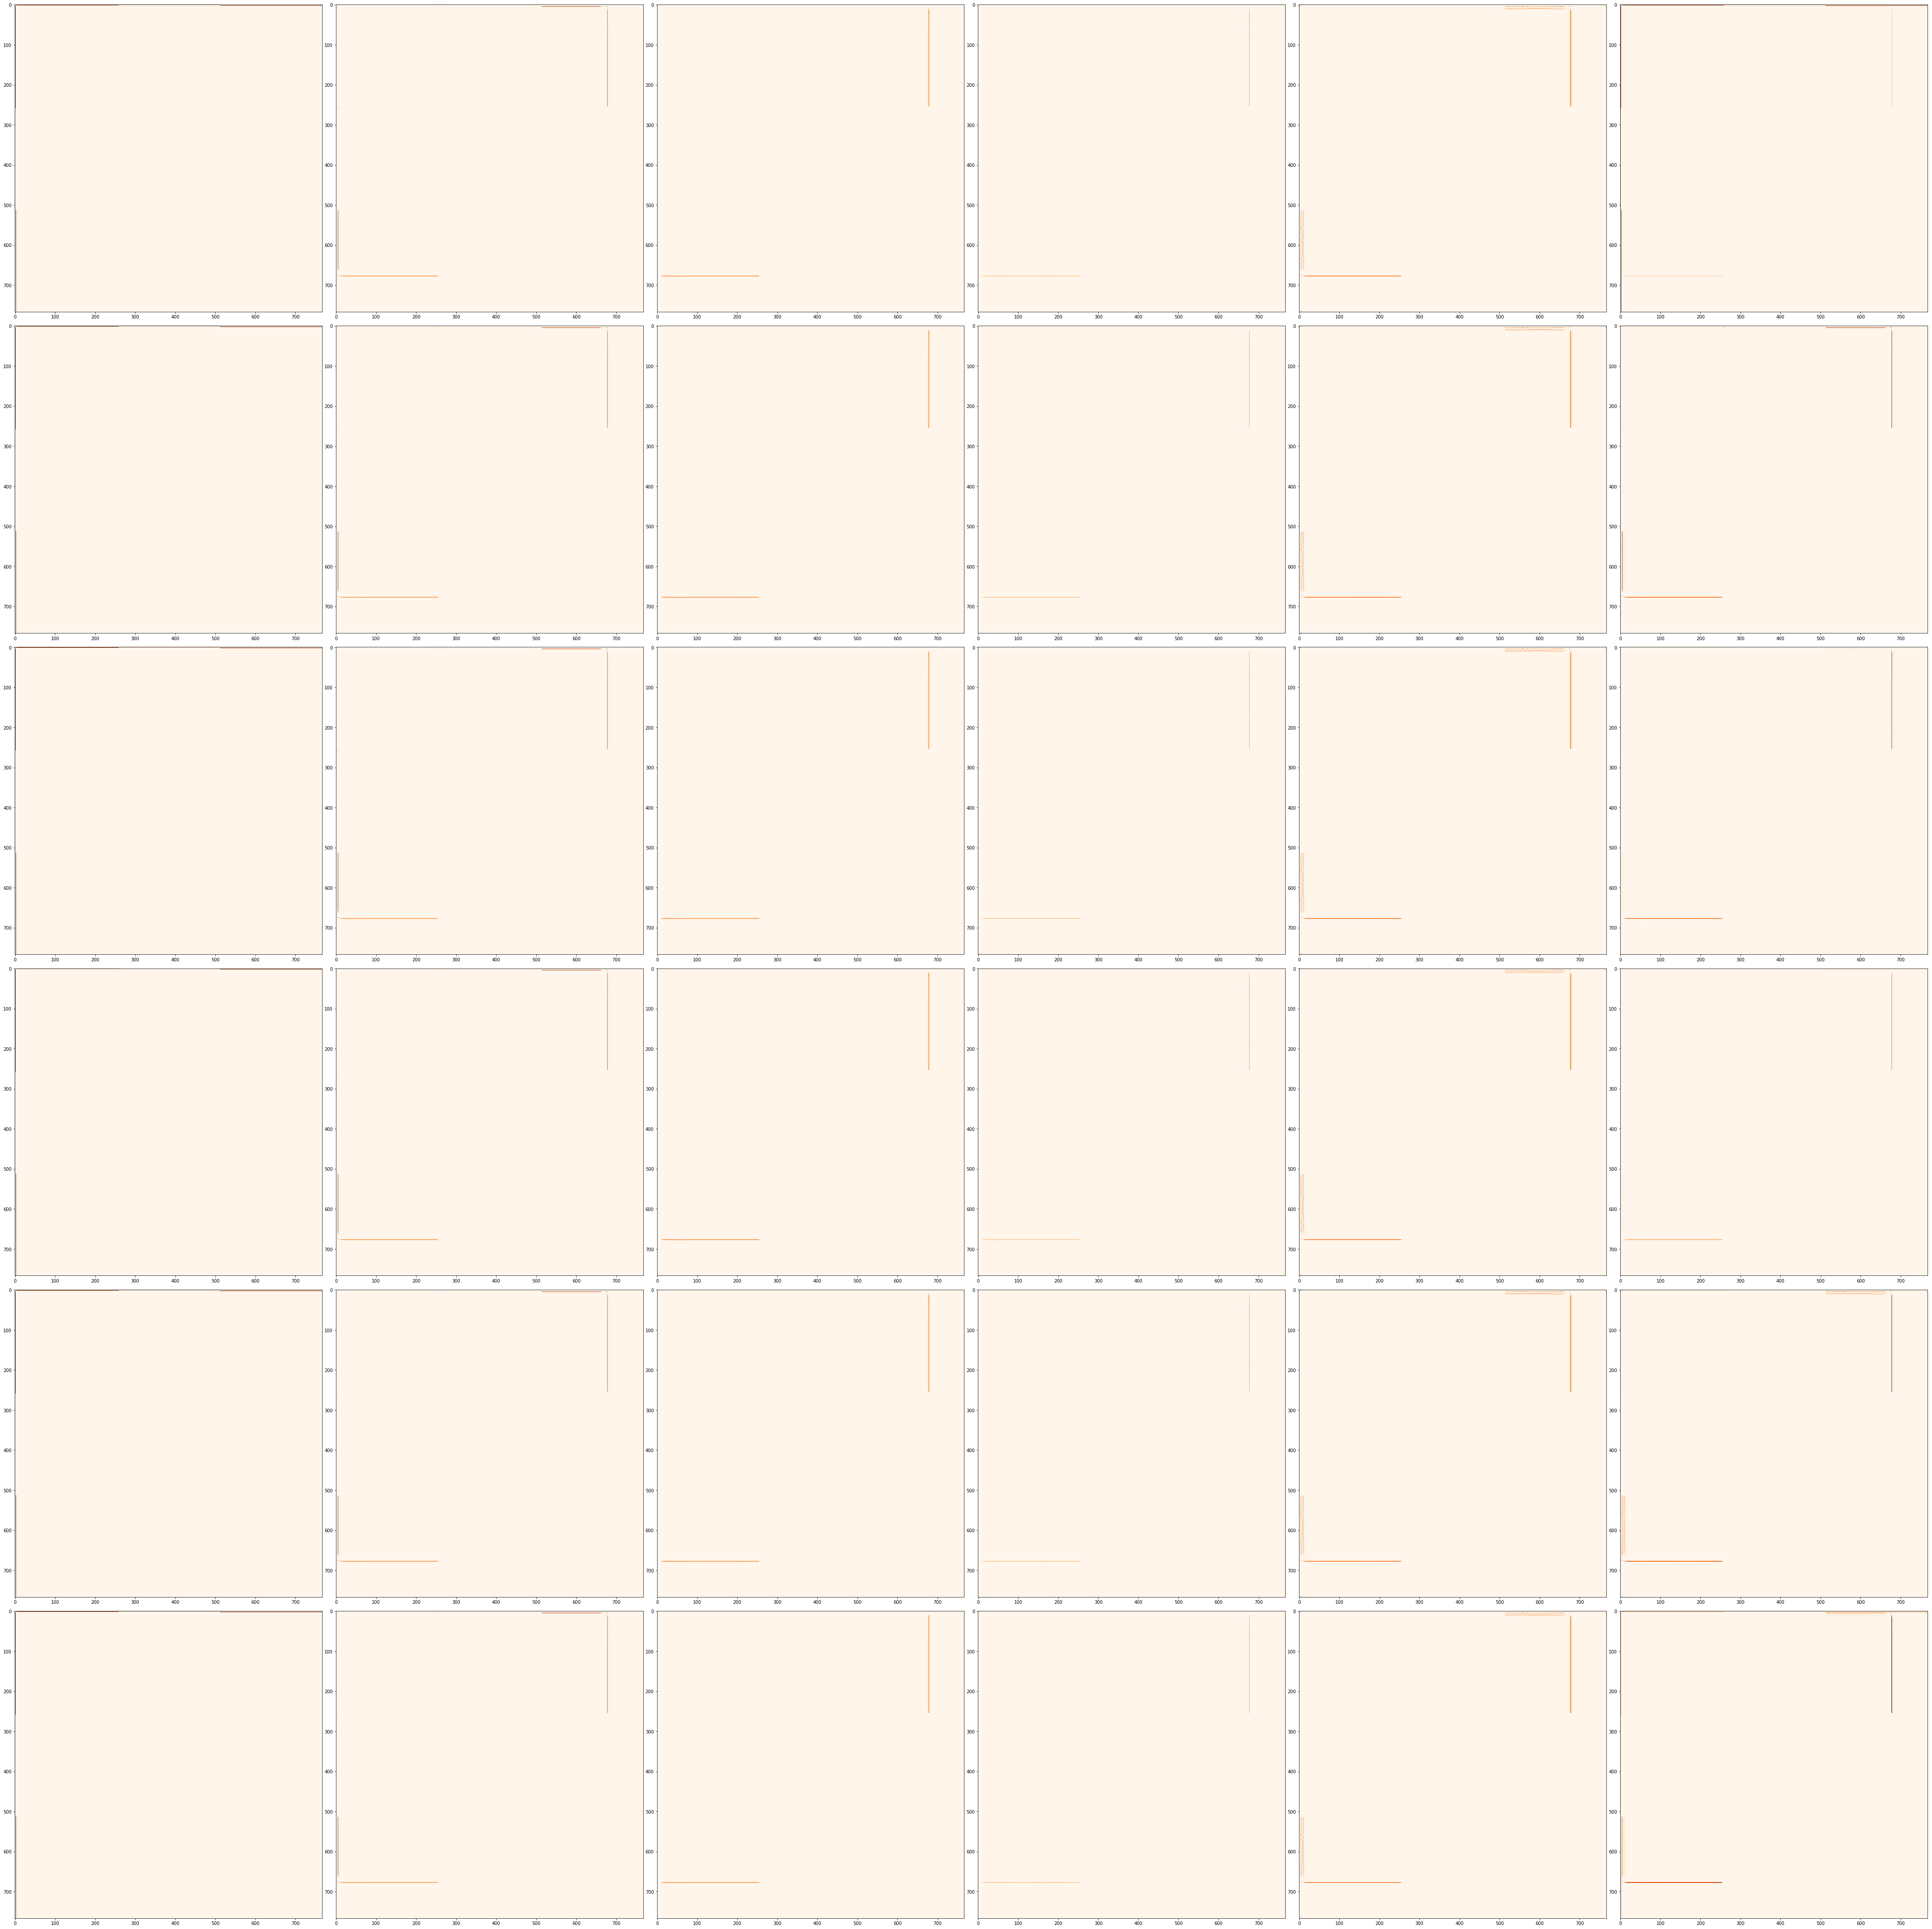

In [17]:
probs = []

STARTS = [0] #, 96, 144]
STOPS = [192] # , 144, 192]

for start, stop in zip(STARTS, STOPS):
    dns_count = data["dns"][stop] - data["dns"][start]
    web_count = data["web"][stop] - data["web"][start]
    mail_count = data["email"][stop] - data["email"][start]
    other_count = data["other"][stop] - data["other"][start]

    # slice topo data to omit unobserved nodes!
    # obs_counts = dns_count + web_count
    # unused = np.asarray(np.sum(obs_counts, 1) == 0.0).flatten()
    # for i in unused:
    #     for j in unused:
    #         topo_count[i,j] = 0.0
    # topo_count.eliminate_zeros()

    #topo_prob = graphs.get_prob_matrix(topo_count)

    dns_prob = graphs.get_prob_matrix(dns_count)
    web_prob = graphs.get_prob_matrix(web_count)
    mail_prob = graphs.get_prob_matrix(mail_count)
    other_prob = graphs.get_prob_matrix(other_count)

    H = 10
    for blend_weights in [(H,1,1,1,1), (1,H,1,1,1), (1,1,H,1,1), (1,1,1,H,1), (1,1,1,1,H), (1,1,1,1,1)]:

        blend_prob = blend([topo_prob, dns_prob, web_prob, mail_prob, other_prob], blend_weights)

        probs += [topo_prob, dns_prob, web_prob, mail_prob, other_prob, blend_prob]

view_probs(probs, ncols=6)

plt.show()